**Name: Mohammad Taslimi**

**Student Number: 99101321**

In this notebook we investigate how effective the poisoning attacks are when applied to two different transfer learning scenarios. Particularly we are intersted to attack a model such that it predicts a nice deer instance as a truck while maintaining clean acurracy on the test set.

Note: Don't panic if you see lots of TODOs! They are mostly easy and short.

# Downloading data and model set-up

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision.utils
from torch.utils.data import DataLoader, TensorDataset, ConcatDataset
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

batch_size = 128

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

100%|██████████| 170498071/170498071 [00:08<00:00, 19472796.77it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.feature_extractor = nn.Sequential(
            *list(resnet18(weights=ResNet18_Weights.DEFAULT).children())[:-2])
        self.fc = nn.Linear(512, 10)

    def get_features(self, x):
      return self.feature_extractor(x)

    def forward(self, x):
        feature = self.get_features(x)
        return self.fc(torch.flatten(feature, start_dim=1))

In [4]:
def standard_test(model, loader, device=device):
  correct = 0
  total = 0
  model.eval()
  with torch.no_grad():
    for data in tqdm(loader):

        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
  print(f'\n Clean accuracy of the network on the 10000 test images: {100 * correct / total} %')


def standard_train(model, loader, num_epoch, optimizer, criterion, device=device):
    model.train()
    for epoch in range(num_epoch):
      running_loss = 0.0
      for i, data in enumerate(loader, 0):
          inputs, labels = data[0].to(device), data[1].to(device)
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          running_loss += loss.item()

      print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))
      standard_test(clean_model, testloader)

In [5]:
clean_model = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(clean_model.parameters(), lr=0.001)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s]


In [7]:
########################## Problem 1 (5 points) ##############################
# TODO: Fine-tune the whole model using trainloader.                         #
##############################################################################

# your code goes here
num_epoch = 15
standard_train(clean_model, trainloader, num_epoch, optimizer, criterion, device=device)
################################ End #########################################

Epoch 1 loss: 0.822


100%|██████████| 79/79 [00:02<00:00, 29.94it/s]



 Clean accuracy of the network on the 10000 test images: 75.81 %
Epoch 2 loss: 1.478


100%|██████████| 79/79 [00:01<00:00, 40.72it/s]



 Clean accuracy of the network on the 10000 test images: 73.37 %
Epoch 3 loss: 0.652


100%|██████████| 79/79 [00:01<00:00, 41.56it/s]



 Clean accuracy of the network on the 10000 test images: 76.44 %
Epoch 4 loss: 0.504


100%|██████████| 79/79 [00:01<00:00, 40.83it/s]



 Clean accuracy of the network on the 10000 test images: 77.18 %
Epoch 5 loss: 0.409


100%|██████████| 79/79 [00:02<00:00, 30.32it/s]



 Clean accuracy of the network on the 10000 test images: 80.53 %
Epoch 6 loss: 0.329


100%|██████████| 79/79 [00:01<00:00, 42.64it/s]



 Clean accuracy of the network on the 10000 test images: 80.26 %
Epoch 7 loss: 0.268


100%|██████████| 79/79 [00:01<00:00, 42.13it/s]



 Clean accuracy of the network on the 10000 test images: 78.77 %
Epoch 8 loss: 0.225


100%|██████████| 79/79 [00:01<00:00, 42.25it/s]



 Clean accuracy of the network on the 10000 test images: 79.88 %
Epoch 9 loss: 0.187


100%|██████████| 79/79 [00:02<00:00, 30.00it/s]



 Clean accuracy of the network on the 10000 test images: 79.8 %
Epoch 10 loss: 0.162


100%|██████████| 79/79 [00:01<00:00, 42.14it/s]



 Clean accuracy of the network on the 10000 test images: 78.39 %
Epoch 11 loss: 0.138


100%|██████████| 79/79 [00:01<00:00, 41.90it/s]



 Clean accuracy of the network on the 10000 test images: 79.16 %
Epoch 12 loss: 0.127


100%|██████████| 79/79 [00:01<00:00, 41.22it/s]



 Clean accuracy of the network on the 10000 test images: 78.5 %
Epoch 13 loss: 0.121


100%|██████████| 79/79 [00:02<00:00, 36.70it/s]



 Clean accuracy of the network on the 10000 test images: 79.46 %
Epoch 14 loss: 0.102


100%|██████████| 79/79 [00:01<00:00, 41.70it/s]



 Clean accuracy of the network on the 10000 test images: 78.34 %
Epoch 15 loss: 0.098


100%|██████████| 79/79 [00:01<00:00, 42.13it/s]


 Clean accuracy of the network on the 10000 test images: 78.36 %


# Computing clean accuracy

In [8]:
def standard_test(model, loader, device=device):
  correct = 0
  total = 0
  model.eval()
  with torch.no_grad():
    for data in tqdm(loader):

        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
  print(f'\n Clean accuracy of the network on the 10000 test images: {100 * correct / total} %')

In [9]:
standard_test(clean_model, testloader)

100%|██████████| 79/79 [00:02<00:00, 33.33it/s]


 Clean accuracy of the network on the 10000 test images: 78.36 %


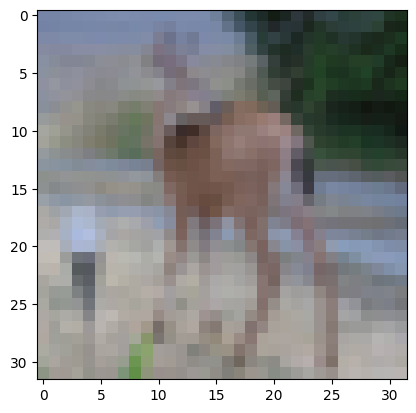

The predicted label for the given image is: deer


In [10]:
deer = testloader.dataset[100][0]

########################## Problem 2 (4 points) ##############################
# TODO: Show the provided deer image and evaluate the model on it            #
# (compute predicted label)                                                  #
##############################################################################

# your code goes here

plt.imshow(deer.permute(1, 2, 0)) # assuming the image is in CxHxW format
plt.show()

def prediction_one_image(image, model):
    if len(image.shape) == 3:
       image = image.unsqueeze(0)

    if torch.cuda.is_available():
       if not image.is_cuda:
          image = image.cuda()

    if not next(clean_model.parameters()).is_cuda:
       model = model.to(device)


    model.eval()
    output = model(image)
    _, prediction = output.max(1)

    return prediction



predicted_label = prediction_one_image(image=deer, model=clean_model)
print(f'The predicted label for the given image is: {classes[predicted_label.item()]}')


################################ End #########################################

# Poisoning Attack - Last Layer Transfer Learning

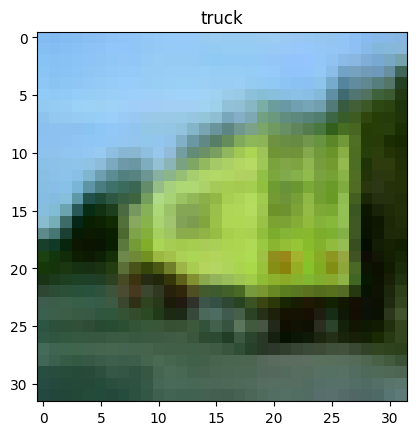

The predicted label for the given image is: truck


In [11]:
truck = testloader.dataset[568][0]
plt.imshow(truck.permute(1,2,0))
plt.title('truck')
plt.show()

predicted_label = prediction_one_image(image=truck, model=clean_model)
print(f'The predicted label for the given image is: {classes[predicted_label.item()]}')


In [27]:

def poisoning_example_generation(t, b, model, device=device, lmda=0.001, max_iters=100, beta=1):
    """
    t: target instance (tensor)
    b: base instance (tensor)
    model: model with a get_features method
    device: device to run the computation on ('cpu' or 'cuda')
    lmda: learning rate
    max_iters: maximum number of iterations
    beta: weighting factor for the feature space loss
    """
    t = t.clone().detach().requires_grad_(False).to(device)
    b = b.clone().detach().requires_grad_(False).to(device)

    sample = b.clone().detach().requires_grad_(True).to(device)

    optimizer = torch.optim.Adam([sample], lr=lmda)

    model.eval()

    for i in range(max_iters):
        optimizer.zero_grad()

        sample_features = model.get_features(sample)
        target_features = model.get_features(t)


        input_space_loss = F.mse_loss(sample, b)
        feature_space_loss = F.mse_loss(sample_features, target_features)

        loss = input_space_loss + beta * feature_space_loss

        loss.backward()
        optimizer.step()

    return sample.detach().squeeze().cpu()


In [13]:
########################## Problem 4 (6 points) ##############################
# TODO: Copy the clean_model to a new model and name it attacked_model,      #
# then freeze the feature extractor, finally initialize the fc layer         #
# to random values.                                                          #
##############################################################################

# your code goes here

import copy

def attack_model(clean_model):
    attacked_model = copy.deepcopy(clean_model)

    for param in attacked_model.feature_extractor.parameters():
        param.requires_grad = False

    def initialize_fc_layer(fc_layer):
        if isinstance(fc_layer, nn.Linear):
            nn.init.kaiming_normal_(fc_layer.weight)
            if fc_layer.bias is not None:
                nn.init.constant_(fc_layer.bias, 0)

    attacked_model.fc.apply(initialize_fc_layer)

    return attacked_model

attacked_model = attack_model(clean_model).to(device)

################################ End #########################################

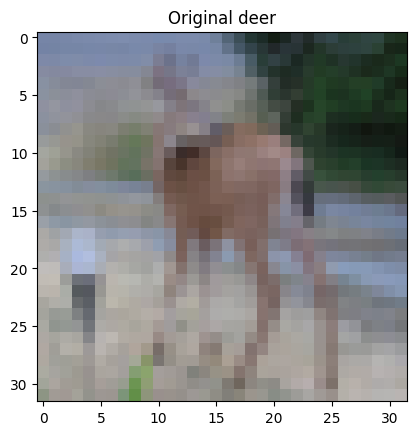

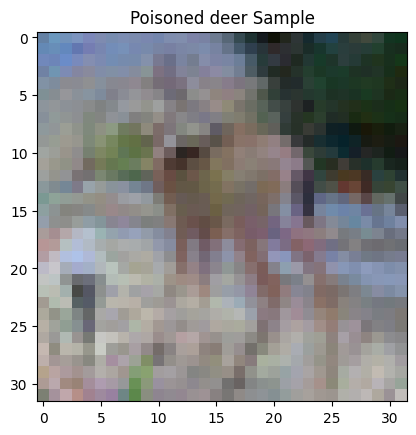

In [17]:
########################## Problem 5 (3 points) ##############################
# TODO: Create a poison sample for the truck instance and show it.           #
# Note that you may need a back and forth procedure to create a good poison! #
##############################################################################

# your code goes here

import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms


# Extract the truck instance from the dataset
truck = testloader.dataset[568][0]
base = deer
target = truck
dim_base = base.shape[2]
beta = 0.25*(2048**2)/(dim_base**2)
poisoned_sample = poisoning_example_generation(target.unsqueeze(0), base.unsqueeze(0), clean_model, device=device, beta=beta)

plt.imshow(deer.permute(1, 2, 0))
plt.title('Original deer')
plt.show()

plt.imshow(poisoned_sample.permute(1, 2, 0))
plt.title('Poisoned deer Sample')
plt.show()




################################ End #########################################

In [18]:
poisoned_sample_label = prediction_one_image(poisoned_sample, clean_model)
print(f"label predicted by clean model for poisoned deer is {classes[poisoned_sample_label]}")

label predicted by clean model for poisoned deer is truck


In [19]:
########################## Problem 6 (3 points) ##############################
# TODO: Add your poisoned truck to the trainloader and name it               #
# poisoned_trainloader                                                       #
##############################################################################

# your code goes here

from torch.utils.data import DataLoader, Dataset, TensorDataset, ConcatDataset

deer_label = testloader.dataset[100][1]

poisoned_sample_dataset = TensorDataset(poisoned_sample.unsqueeze(0), torch.tensor([deer_label]))

poisoned_train_dataset = ConcatDataset([trainloader.dataset, poisoned_sample_dataset])

poisoned_trainloader = DataLoader(poisoned_train_dataset, batch_size=trainloader.batch_size, shuffle=True)



################################ End #########################################

In [20]:
len(poisoned_trainloader.dataset)

50001

In [24]:
########################## Problem 7 (4 points) ##############################
# TODO: Fine-tune the last layer of the model which is fc using              #
# poisoned_trainloader.                                                      #
##############################################################################

# your code goes here


import torch
import torch.nn as nn
import torch.optim as optim

def fine_tune_fc_layer(model, trainloader, num_epochs=10, learning_rate=0.001):
    model.train()

    optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader)}')

    print('Finished Fine-tuning')


fine_tune_fc_layer(attacked_model, poisoned_trainloader, num_epochs=5, learning_rate=0.001)


################################ End #########################################

Epoch [1/5], Loss: 0.3769514586233422
Epoch [2/5], Loss: 0.3774974151035709
Epoch [3/5], Loss: 0.37089921675069865
Epoch [4/5], Loss: 0.3691807095047153
Epoch [5/5], Loss: 0.3673361760880941
Finished Fine-tuning


In [25]:
standard_test(attacked_model, testloader)

100%|██████████| 79/79 [00:02<00:00, 27.20it/s]


 Clean accuracy of the network on the 10000 test images: 78.36 %


In [26]:
########################## Problem 8 (2 points) ##############################
# TODO: Now evaluate the attacked_model on the deer image.                   #
##############################################################################

# your code goes here

deer_label = prediction_one_image(deer, attacked_model)
print(f'The predicted label for the deer image using attacked model is: {classes[deer_label.item()]}')




predicted_label = prediction_one_image(poisoned_sample, attacked_model)
print(f'The predicted label for the poisoned image using attacked model is: {classes[predicted_label.item()]}')

predicted_label = prediction_one_image(poisoned_sample, clean_model)
print(f'The predicted label for the poisoned image using clean model is: {classes[predicted_label.item()]}')



################################ End #########################################

The predicted label for the deer image using attacked model is: deer
The predicted label for the poisoned image using attacked model is: frog
The predicted label for the poisoned image using clean model is: truck


## Analyzing the results
Please answer these follow-up questions below them. (6 points)

1. Was the attack successful? Why?

`Answer`: No, the attack was not successful. The reason is that the decision boundary did not alter in such a manner that would cause the specified deer sample to be classified as a truck. Despite the attack, the sample continues to be classified as a deer. Interestingly, the poisoned sample is now classified as a frog.

1. How does choice of base instance affect the attack success?

`Answer`:
The choice of the base instance significantly influences the success of the attack. If the decision boundaries of the base instance and the target instance are adjacent to each other, the probability of a successful attack increases. This is because fine-tuning the last layer causes a rotation in the decision boundary. Therefore, the closer these boundaries are, the more likely the rotation will result in a successful reclassification.

2. How do you suggest to choose the base instance other than the random method we used?

`Answer`:
 If the decision boundaries of the base instance and the target instance are adjacent to each other, the probability of a successful attack increases.

# Posioning Attack - End2End Transfer Learning

In [28]:
def poisoning_watermark_generation(t, b, gamma=0.1):
  """
  t: target instance
  b: base instance
  gamma: opacity
  """
########################## Problem 9 (4 points) ##############################
# TODO: Add a low opacity watermark of the target instance to the base       #
##############################################################################

# your code goes here
  sample = gamma*t + (1-gamma)*b
################################ End #########################################

  return sample

In [62]:
########################## Problem 10 (5 points) ##############################
# TODO: Sample 100 instances of the truck class from the testloader randomly  #
# and then create poison samples for them using the watermark approach.       #
# Finaly add these poisoned samples to create poisoned_trainloader.           #
###############################################################################


def sample_truck_instances(testloader, num_samples=100, truck_class=9):
    truck_samples = []
    truck_labels = []

    for images, labels in testloader:
        for img, label in zip(images, labels):
            if label == truck_class:
                truck_samples.append(img)
                truck_labels.append(label)
            if len(truck_samples) >= num_samples:
                return truck_samples, truck_labels

    return truck_samples, truck_labels

def create_poisoned_samples(model, truck_samples, base_instance, beta):
    poisoned_samples = []

    for sample in truck_samples:
        sample = poisoning_watermark_generation(t=sample, b=base_instance)
        poisoned_sample = poisoning_example_generation(sample.unsqueeze(0), base_instance.unsqueeze(0), model, beta=beta)
        poisoned_samples.append(poisoned_sample)

    return poisoned_samples

def create_poisoned_trainloader(trainloader, poisoned_samples, truck_labels):

    poisoned_sample_dataset = TensorDataset(torch.stack(poisoned_samples), torch.tensor(truck_labels))

    poisoned_train_dataset = ConcatDataset([trainloader.dataset, poisoned_sample_dataset])

    poisoned_trainloader = DataLoader(poisoned_train_dataset, batch_size=trainloader.batch_size, shuffle=True)

    return poisoned_trainloader


truck_samples, truck_labels = sample_truck_instances(testloader, num_samples=100)
base_instance = deer
dim_base = base.shape[2]
beta = 0.25*(2048**2)/(dim_base**2)

poisoned_samples = create_poisoned_samples(clean_model, truck_samples, base_instance, beta=beta)

poisoned_trainloader = create_poisoned_trainloader(trainloader, poisoned_samples, truck_labels)

print(len(poisoned_trainloader.dataset))
################################ End ##########################################

50100


In [63]:
########################## Problem 11 (3 points) #############################
# TODO: copy the clean_model to a new model and name it attacked_model,      #
# Note that all of the parameters must be trainable.                         #
##############################################################################

# your code goes here

def create_attacked_model(clean_model):
    attacked_model = copy.deepcopy(clean_model)

    for param in attacked_model.parameters():
        param.requires_grad = True

    return attacked_model

attacked_model = create_attacked_model(clean_model)


################################ End #########################################

In [67]:
########################## Problem 12 (3 points) ##############################
# TODO: Fine-tune the whole model using poisoned_trainloader.                 #
###############################################################################

# your code goes here

def fine_tune_fc_layer(model, trainloader, num_epochs=2, learning_rate=0.001):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()


            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader)}')
        standard_test(attacked_model, testloader)

    print('Finished Fine-tuning')


fine_tune_fc_layer(attacked_model, poisoned_trainloader, num_epochs=1, learning_rate=0.001)


################################ End ##########################################

Epoch [1/1], Loss: 0.08103222023025725


100%|██████████| 79/79 [00:01<00:00, 42.70it/s]


 Clean accuracy of the network on the 10000 test images: 78.1 %
Finished Fine-tuning


In [68]:
standard_test(attacked_model, testloader)

100%|██████████| 79/79 [00:02<00:00, 37.47it/s]


 Clean accuracy of the network on the 10000 test images: 78.1 %


In [69]:
########################## Problem 13 (2 points) #############################
# TODO: Now evaluate the attacked_model on the deer image.                   #
##############################################################################

# your code goes here
deer_label = prediction_one_image(deer, attacked_model)
print(f'The predicted label for the deer image using attacked model is: {classes[deer_label.item()]}')


################################ End #########################################

The predicted label for the deer image using attacked model is: truck


## Analyzing the results
Please answer this follow-up questions below it. (2 points)

1. How do the poisons have different effect on the model in two transfer learning scenarios you investiagted?


`Answer`:

In the first scenario, where the model is fine-tuned on a poisoned dataset, the poison instances can significantly alter the decision boundary. This is because the model is directly learning from the poisoned data, which can lead to misclassification of the target instances.

In the second scenario, where the model is pre-trained on a clean dataset and then fine-tuned on the poisoned dataset, the effect of the poison instances might be less pronounced. This is because the initial learning from the clean dataset could provide a form of regularization that makes the model more resistant to the poison instances. However, if the poison instances are carefully crafted, they can still cause the model to misclassify the target instances.